# About Dataset

This dataset containing information of food restraunts in banglaore who are working with Zomato.The data was scraped from Zomato in two phase. After going through the structure of the website I found 
* for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars.
* So, here we are trying to find the best restaurants for customer depends on their need.

## Possible Findings :

* 1) How many restaurants accpeting online order for zomato?
* 2) Find best location by seeing dataset.
* 3) Find Types of restraunts and their count.
* 4) Find count of restaurants have table boking facility.
* 5) Find number of restaurant at given location.
* 6) Find most famous restaurants chains(like Franchise(Rastaurants having more than one branch) in Bangalore.
* 7) Find how many voters gives rating for each 'type' and aggregate rating of that 'type'.
* 8) Gaussian Rest Type(Normal Distribution) of Rating.
* 9) Find the how many Restaurants havign Chinese and North Indian food in their food type.
* 10) Find the most profitable type of restaurant.



# Exploratory Analysis

To begin this exploratory analysis, first to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made.

# Process of Data Cleaning

First we are trying to clean our data for the better results.

## Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # regex pattern matching
import warnings
warnings.filterwarnings('ignore')# Ignoring warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
                                
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tomato-reviews/zomato.csv


## Reading Dataset

In [2]:
zmt=pd.read_csv('/kaggle/input/tomato-reviews/zomato.csv')

In [3]:
zmt.head() # reading 1st five rows of our dataset using .head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zmt.info() #checking information of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Here we can see we are having 17 columns and some columns including NaN values and incorrect data_types.

Ex: approx_cost(for two people) column has integer values but having object data_type.


## Droping Unnecessary Columns

Unnecessary Columns:

Unnecessary columns are those columns which are not that useful for analysis.

Ex: Phone_Number, we not able to predict anything using Phone numbers. So, we can drop that columns which we are not going to use.

In [5]:
zmt.drop(['url','reviews_list','menu_item','address','phone','dish_liked'],axis=1,inplace=True)

In [6]:
zmt.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari


Here, we are geeting only those columns which are useful for analysis.

## Renaming Columns 

We are renaming the columns for better readability

In [7]:
zmt.rename(columns={'name':'restaurants','rate':'rating','cuisines':'food_type','listed_in(type)':'type','listed_in(city)':'city','approx_cost(for two people)':'cost'},inplace=True)

In [8]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


## Droping NaN values

In [9]:
zmt.dropna(inplace = True) # Droping NaN values for better result using dropna()

# Cleaning Individual Columns

#### Column : 'restaurants'

Column contains Restaurant Names

In [10]:
zmt.groupby('restaurants').count().head() # we are grouping the restaurants to see the restaurant names and their count.

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
restaurants,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3,3,3,3,3,3,3,3,3,3


Here we can see we are got restaurant names having disturbed characters

so we need to remove that characters from the name using pattern matcing to get orignal names.

In [11]:
# '[Ãx][^A-Za-z]+' pattern I got to find disturbed characters using regex.And Replacing those charachters with empty space. 
zmt['restaurants']=zmt['restaurants'].str.replace('[Ãx][^A-Za-z]+','',regex=True)


In [12]:
zmt.groupby('restaurants').count().head()

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
restaurants,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6
100C,3,3,3,3,3,3,3,3,3,3


Here see we successfully removed the disturbed characters from restaurant name(refer 5th row to see transformation)  

By reading the databse I found the names having incorrect spell. Let me correct them as well. 

In [13]:
zmt['restaurants']=zmt['restaurants'].str.replace('Caf-|Caf ','Cafe ',regex=True) # replacing the Caf- or Caf names with cafe using pattern matching

#### Column: 'online_order'

Column shows that restaurants accepting online orders or not.

In [14]:
zmt['online_order'].unique() # Using .unique() we can find the unique values from column

array(['Yes', 'No'], dtype=object)

Here, we can see only Yes and No values are present so there is no need to clean the column.

#### Column: 'book_table'

Column shows that restaurants having table booking facility or not.

In [15]:
zmt['book_table'].unique()

array(['Yes', 'No'], dtype=object)

Here also we got the same result so no need to perform any cleaning

#### Column: 'rating'

Column shows the rating of the hotel out of 5

In [16]:
zmt['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Here, we can see rating column having string values and having object datatype including 'NEW' and '-' values. we know that rating is always out of 5 and in decimal format. So, we need to clean our 'rating' columns.

Need changes:
* Remove 'NEW' and '-' values.
* Remove '/5' from the rating.
* Covert datatype object to float (float_datatype has decimal values).

Try to do all changes in one block of code

In [17]:
replace=lambda x:x.replace('/5',"") # lambda function to replace /5 to empty string
l=[] # list to store cleaned values
for val in map(replace, zmt['rating']): # map function to read data from column and replace /5 to empty string
    if val!='NEW' and val!='-':  # excluding 'NEW' and '-' values
        var=float(val) # converting the result in float datatype and storing into one variable
    l.append(var) # appending cleaned values in created list
zmt['rating']=l  # updating rating column with new and cleaned values

In [18]:
zmt['rating'].unique(),zmt['rating'].dtype


(array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
        4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
        4.8, 4.9, 2.1, 2. , 1.8]),
 dtype('float64'))

See we got the cleaned values with float datatype.

#### Column: 'votes'

Column contains number of votes hotel got.

In [19]:
zmt['votes'].isnull().value_counts() # checking column having null values or not using .isnull()

False    43533
Name: votes, dtype: int64

Here, we can see there is no null values and having correct datatype. So, no need to clean anything.

#### Column: 'location'

Column contains locations of restaurants.

In [20]:
zmt.location.unique() # This syntax is works similer like previous so don't be confuse.

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

Here, aslo all things are correct so no need to perform data cleaning

#### Column: 'rest_type' and 'food_type'

Columns shows that the restaurant types and which type of food restaurants have. 

In [21]:
zmt.rest_type.unique(), zmt.rest_type.isnull().value_counts()

(array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
        'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
        'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
        'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
        'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
        'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
        'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
        'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
        'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
        'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
        'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
        'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
        'Quick Bites, Sweet Shop', 'Microbrewery',
        'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
        'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
        'Dessert Parlor, Quick Bites

In [22]:
zmt.food_type.unique(), zmt.food_type.isnull().value_counts()

(array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
        'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
        'North Indian, Street Food, Biryani',
        'North Indian, Chinese, Arabian, Momos'], dtype=object),
 False    43533
 Name: food_type, dtype: int64)

As we see column 'rest_type' and 'food_type' are aslo correct so no need to perform any cleaning operations.

#### Column: 'cost'

Column contains approximate cost for two people.

In [23]:
zmt.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

Here see cost column string values with ',' values. And we know cost is always in int sp we need to make some transformations.

Changes need:
* Remove ',' from values
* Change datatype object to integer(int)

In [24]:
zmt['cost']= zmt['cost'].apply(lambda x:x.replace(",","")).astype(int) # we can also apply lambda function using .apply()

In [25]:
zmt.cost.unique(),zmt.cost.dtype

(array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
         750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
         199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
        2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
          40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
         360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500]),
 dtype('int64'))

Here, Using lambda function we replaced ',' to empty string and using astype(int) we converted datatype object to int and update in the cost column and we got cleaned data.

#### Column: 'type'
Column shows which types of arrangment restaurant have.

In [26]:
zmt.type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

Here also all values are correct and having correct datatype so no need to perform cleaning.

#### Column: 'city'
Column contains name of cities of restaurants

In [27]:
zmt.city.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

Here also all values are correct and having correct datatype so no need to perform cleaning.

## Droping Duplicates

Dropping duplicates means we are removing repeated values or duplicate values from the dataset.

In [28]:
zmt.duplicated().value_counts() # by using .duplicated() we can see duplicate values from our dataset.

False    43453
True        80
dtype: int64

We got 80 duplicate values in our dataset we need to remove those.

In [29]:
zmt.drop_duplicates(keep='last',inplace=True)# dropping duplicates values using .drop_duplicates()
zmt.reset_index(drop=True,inplace=True) # reseting index

In [30]:
zmt.duplicated().value_counts()

False    43453
dtype: int64

As a final step we removed all duplicate values from our dataset and we got fully cleaned data.

In [31]:
zmt

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
43448,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
43449,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
43450,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars,Whitefield
43451,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars,Whitefield


In [32]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43453 entries, 0 to 43452
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   43453 non-null  object 
 1   online_order  43453 non-null  object 
 2   book_table    43453 non-null  object 
 3   rating        43453 non-null  float64
 4   votes         43453 non-null  int64  
 5   location      43453 non-null  object 
 6   rest_type     43453 non-null  object 
 7   food_type     43453 non-null  object 
 8   cost          43453 non-null  int64  
 9   type          43453 non-null  object 
 10  city          43453 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.6+ MB


In [33]:
zmt.to_csv('./zomato_clean_data.csv') # Saivng cleaned dataset in output directory.

#### Therefore, we cleaned our data successfully and got 43453 Values of data  out of 51717.

If you have more cleaning ideas on this dataset place in comments or in Diccussion.

# Data Visualization

In data visualization we going to visualize our data how it is, and trying to find some informative data from our dataset.

Here we are going to use two python libraries For visualization.

* Seaborn
* Matplotlib

So, first we are going to import them.

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

##### So we know that we are working on zomato or we can say Restaurants rating dataset. By seaing a datase we can visualize more things,

##### Ex:

* We can find, Restaurants Delivering online or not.
* Restaurants allowing table booking or not.
* Best location to visit.
* Types of Restaurants.
##### and many more. Lets, Explore things by doing practice...

#### We know zomato mostely focused on online delivery lets find,
#### 1) How many restaurants accpeting online order for zomato?

In [35]:
zmt.head(1) # see the name of the cloumns 

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


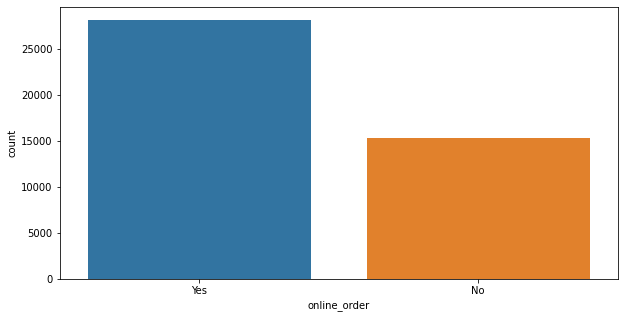

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='online_order',data=zmt) # countplot gives us count of the values
plt.show()

By observing the graph, we can say that 25000+ restaurants are accepting online order for zomato and 15000 restaurants not accepting online orders.

#### 2) Find best location by seeing dataset.

How can we find? :-

We have two columns 'rating' and 'votes' so by geeting the average of those columns with repect to 'location'
we can find the best location.

In [37]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


In [38]:
# sns.barplot(x='location',y='votes',hue='online_order',data=zmt[:50])

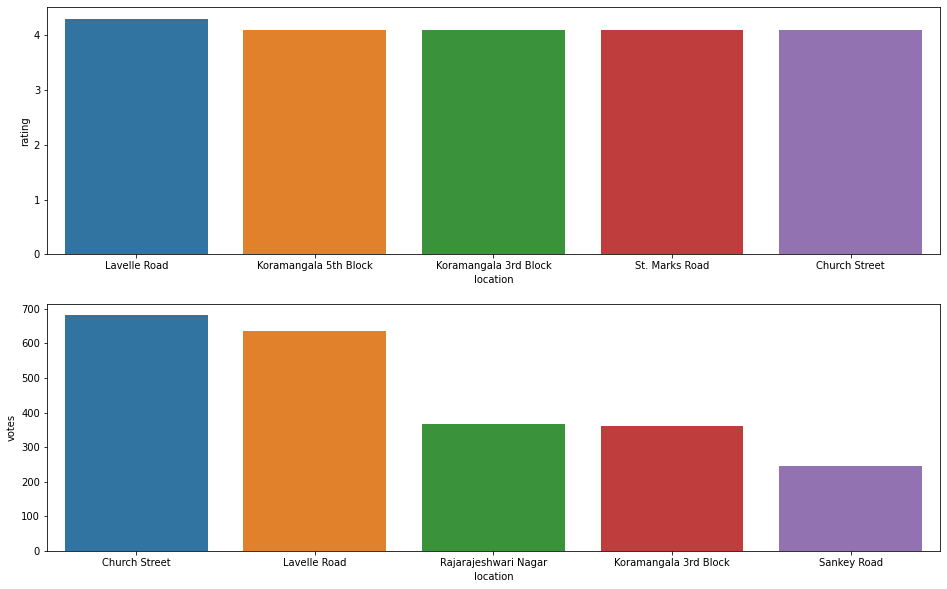

In [39]:
plt.figure(figsize=(16,10)) # seeting graph size using matplotlib
ax = plt.subplot(2,1,1)   # use of Subploting
loc_rating=zmt.groupby('location').agg({'rating':'median'})
rating_sorted_loc=loc_rating.sort_values('rating',ascending=False).head(5).reset_index() # sorting location on avg of votes in descending order and reading first 5 values
sns.barplot(x='location',y='rating',data=rating_sorted_loc) # ploting graph using seaborn

ax = plt.subplot(2,1,2)
loc_votes=zmt.groupby('location').agg({'votes':'median'})
votes_sorted_loc=loc_votes.sort_values('votes',ascending=False).head(5).reset_index() # sorting location on avg of rating in descending order and reading first 5 values
sns.barplot(x='location',y='votes',
            data=votes_sorted_loc)
plt.show()


By observing the above graphs,'levelle Road' has an high rating and votes as well as compare to other. 

So, we can say that 'levelle Road' is a best location by comparing 'votes' and 'rating' of locations.



#### 3) Find Types of restraunts and their count.

In [40]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


(87, <AxesSubplot:xlabel='restaurants', ylabel='rest_type'>)

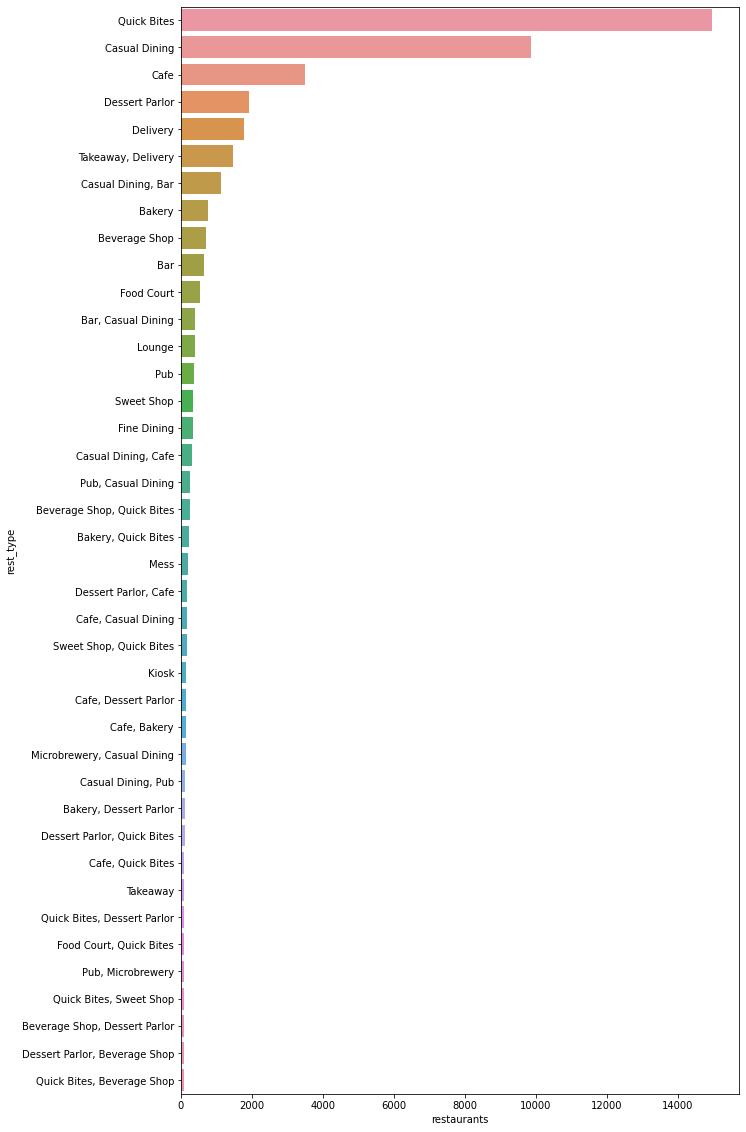

In [41]:
plt.figure(figsize=(10,20))
rest_types=zmt.groupby('rest_type')['restaurants'].count().reset_index()# grouping restaurants types and getting 'restaurant' count
sorted_rest_types=rest_types.sort_values('restaurants',ascending=False).head(40) # sorting restaurant types on 'restaurants' counts in descending order and reading 40 values
rest_types.rest_type.count(),sns.barplot(x='restaurants',y='rest_type',data=sorted_rest_types,orient='h')# drawing horizontal bar plot to see results


by observing above graph, the 1st line of grapth shows the number of rest_type we have that is 87 and we plotted only top 40 types which are high count of restaurants types.

ex:

14000 Quick Bites restaurants.

10000 Casual Dining restaurants.

and so on...

#### 4) Find Cost's Of restaurants 

In [42]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


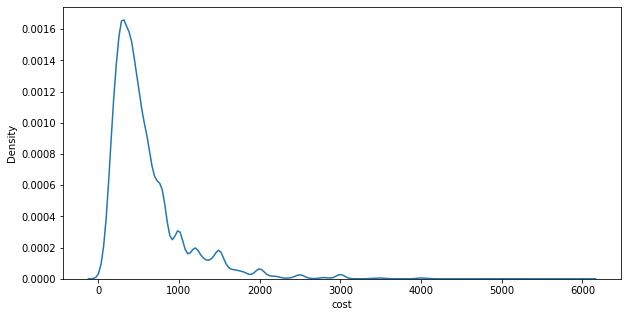

In [43]:
plt.figure(figsize=(10,5))
sns.kdeplot('cost',data=zmt)# KDE plot 
plt.show()

By observing above kde plot we can say that most of the restaurants have cost between 1 to 1000Rs. for food and remaining have above 1000Rs for their food.

#### 4) Find count of restaurants have table boking facility.

Here, we can use countplot but try to drow pointplot to see how it looks like.

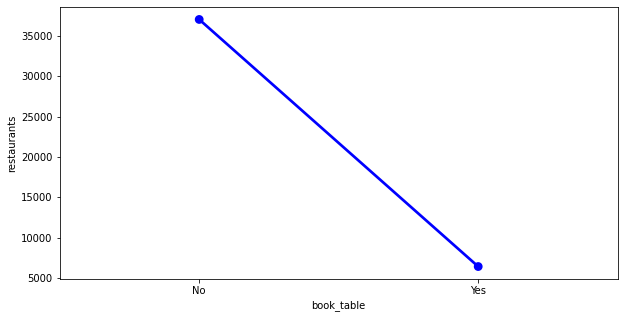

In [44]:
plt.figure(figsize=(10,5))
table_booking= zmt.groupby('book_table')['restaurants'].count().reset_index()
sns.pointplot(x='book_table',y='restaurants',color='b',data=table_booking)
plt.show()

By seeing above pointplot we can say that only 7000 restaurants have table booking facility and 35000+ restaurants don't have facility of table booking.

#### 5) Find number of restaurant at given location.

* 'BTM'
* 'Basavanagudi'
* 'West Bangalore'
* 'Whitefield'
* 'Yeshwantpur'

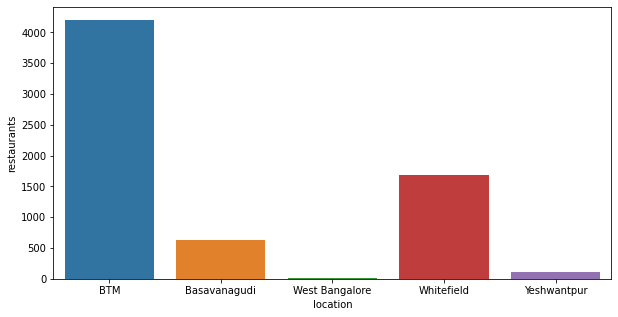

In [45]:
df=pd.DataFrame(zmt.groupby('location')['restaurants'].count()).reset_index()
criteria=df['location'].isin(['BTM','Basavanagudi','West Bangalore','Whitefield','Yeshwantpur']) # selecting given locations from dataset using isin()
plt.figure(figsize=(10,5)) 
sns.barplot(x='location',y='restaurants',data=df[criteria])
plt.show()

By seeing given plot, we can notice that how many restaurants present are at given locations.

Ex:-

BTM lication has 4000+ restaurants


#### 6) Find most famous restaurants chains(like Franchise(Rastaurants having more than one branch) in Bangalore.

We working on a zomato dataset of bangalore location so we can asume that all locations are belongs to bangalore.

* In this problem we need to find restaurant at each location having more than 1 branch and high rating.

In [46]:
df1=pd.DataFrame(zmt.groupby(['location','restaurants','rating']).count()).reset_index() # getting location,restraunts and rating and their count of restaurants
df1

,location,restaurants,rating,online_order,book_table,votes,rest_type,food_type,cost,type,city
0,BTM,100C,3.7,3,3,3,3,3,3,3,3
1,BTM,2nd Home Restaurant,3.7,11,11,11,11,11,11,11,11
2,BTM,36th Cross Coffee Mane,3.7,1,1,1,1,1,1,1,1
3,BTM,"3B's - Buddies, Bar & Barbecues",4.4,13,13,13,13,13,13,13,13
4,BTM,A2B - Adyar Ananda Bhavan,3.8,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
12577,Yeshwantpur,The Cupcake Story,3.5,1,1,1,1,1,1,1,1
12578,Yeshwantpur,The Duke Of Juices,3.3,1,1,1,1,1,1,1,1
12579,Yeshwantpur,Tuckinto,3.8,2,2,2,2,2,2,2,2
12580,Yeshwantpur,Udupi Garden,3.0,2,2,2,2,2,2,2,2


<AxesSubplot:xlabel='cost', ylabel='Density'>

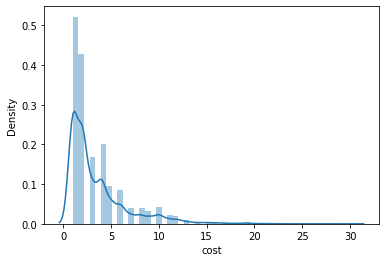

In [47]:
sns.distplot(df1['cost'])

Note that all columns having some count values these are nothing but a count of that restaurant at given location.

We can see some restaurants having 1 count and some having more than 1. We want that restaurants which having more than 1 count and high rating.

In [48]:
chains_restaurants=df1[(df1['book_table']>1)]
famous_restaurants=pd.DataFrame(chains_restaurants.groupby('location')['restaurants','rating'].max()).reset_index()
famous_restaurants

,location,restaurants,rating
0,BTM,eat.fit,4.9
1,Banashankari,Yo Roll Corner,4.6
2,Banaswadi,Zam Zam Restaurant,4.0
3,Bannerghatta Road,Zhangs Classic,4.6
4,Basavanagudi,Zephyr,4.6
...,...,...,...
84,West Bangalore,FreshMenu,3.3
85,Whitefield,nu.tree,4.9
86,Wilson Garden,Vijaya Sagar,4.0
87,Yelahanka,Prashanth Naati Corner,3.9


Finally, we got restaurant at each location has more that one branch and highest rating. Total 89 result we got. Let's try to plot only first 5 to get idea.

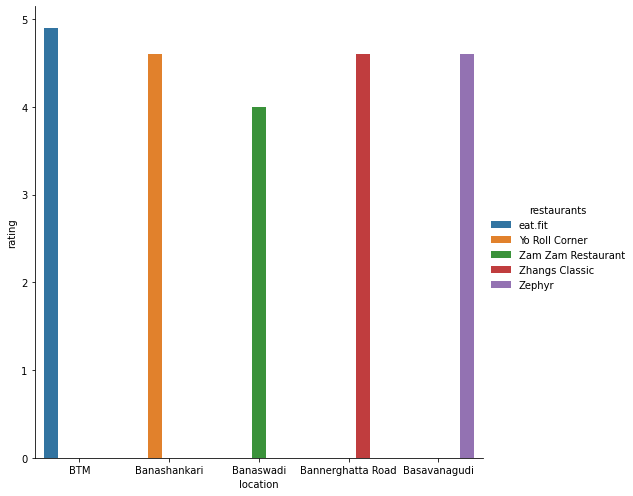

In [49]:
sns.catplot(x="location", y="rating", hue="restaurants",kind='bar',height=7,data=famous_restaurants.head(5))

Here we can see that famous restaurant having more that one branch at location and their rating as well.

Ex.:

* We can say that, at BTM location in bangalore "eat.fit" restaurant is a famous restaurant franchise having maximum rating(4.9) compare to other restaurants franchise's at same location.

* At Banashankari location in bangalore "Yo Roll Corner" restaurant is a famous restaurant franchise having maximum rating(4.6) compare to other restaurants franchise's at same location.


* At Banaswadi location in bangalore "Zam Zam Restaurant" restaurant is a famous restaurant franchise having maximum rating(4.0) compare to other restaurants franchise's at same location.

and so on...

#### 7) Find how many voters gives rating for each 'type' and aggregate rating of that 'type'.

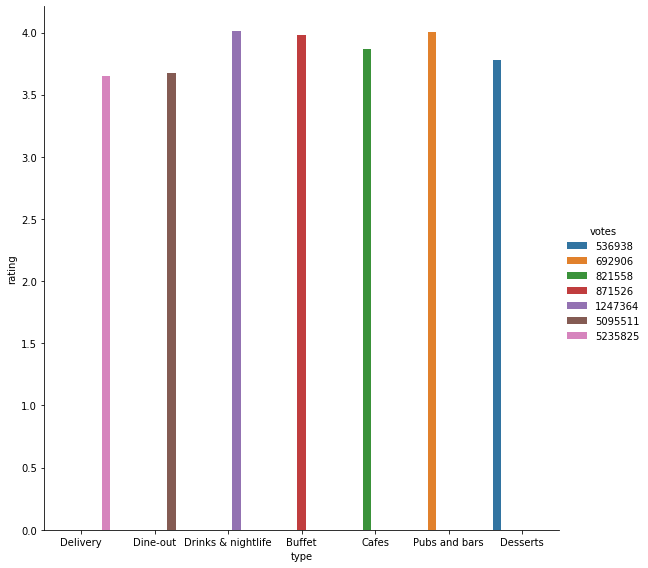

In [50]:
df2=zmt.groupby('type').agg({'votes':'sum','rating':'mean'}).nlargest(7,['votes']).reset_index()
sns.catplot(x='type',y='rating',hue='votes',kind='bar',height=8,data=df2)
plt.show()

Here we can see that, how many voters gives rating for each type and average rating of that type.

Ex.:

Most of the voters(Total 5235825 voters) gives rating to the Delivery and its average rating is 3.7.

and so on...

* Note:

If we see delivery type has low rating but number of voters are high. So it is ok to have low rating because of,

If one voter gives rating to a some product that time we have possibility that the product having 5/5 rating.

And if number of voters are increases then it is possible to get low rating depending upon how many voters rated to that product.

#### 8) Gaussian Rest Type(Normal Distribution) of Rating.

<AxesSubplot:xlabel='rating', ylabel='Density'>

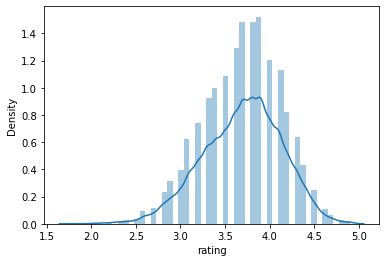

In [51]:
sns.distplot(zmt['rating'])

We got a normal distribution form of our rating and we observe that we have maximum ratings between 3.5 to 4.5. 

#### 9) Find the how many Restaurants havign Chinese and North Indian food in their food type.

In [52]:
Chinese=len([i for i in zmt['food_type'] if 'Chinese' in i]) # count of restaurants who serving chinese food.
North_India=len([i for i in zmt['food_type'] if 'North India' in i]) # count of restaurants who serving North Indian food.
Restaurant_count=[Chinese,North_India] #creating list
Food_Type=['Chinese','North India']
df3 = pd.DataFrame({'Food_Type':Food_Type,'Restaurant_count':Restaurant_count})#.set_index('Food_Type')# creating dataset of extracted data


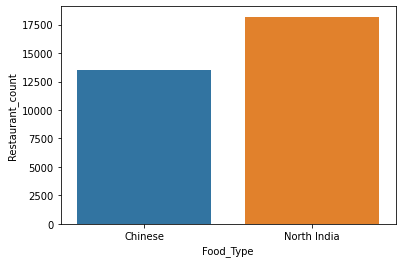

In [53]:
sns.barplot(x='Food_Type',y='Restaurant_count',data=df3) # countplot gives us count of the values
plt.show()

Here, We got actual count of restaurants who serving chinese and North Indian food.

#### 10) Find the most profitable type of restaurant.

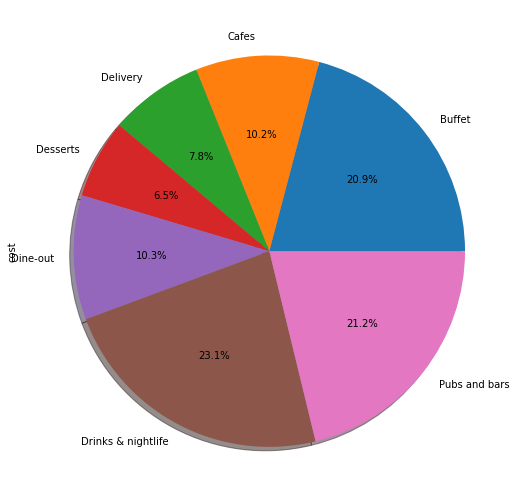

In [54]:
df4=zmt.groupby('type').agg({'cost':'mean'})
df4.cost.plot(kind='pie',autopct='%1.1f%%',figsize=(9,9),shadow=True)
plt.show()

Here, by seeing the total percentage of average cost we can observe that. The restaurants having Drink and Nightlife facility are in high profit than other types.

### Conclusion:

In the Given dataset we have explored and learned many things, 
* we learned about how to clean our data.
* How we can interprete data by visualizing it.

